# Week 7
# Geospatial Plotting with Folium

Folium is a Python wrapper for leaflet.js, a JavaScript library for creating interactive maps. Today we will learn how to use Folium to visualize geospatial data.

In [1]:
# install Folium
!pip install folium

In [2]:
import folium
import numpy as np
import pandas as pd
folium.__version__

'0.11.0'

In [3]:
# To create a base map, simply pass your starting coordinates to Folium:
m = folium.Map(location=[45.5236, -122.6750])

In [5]:
m

In [12]:
# Save it in a file.
import os
# Create the saved sub-folder if it doesn't exist
print(os.getcwd()) # displays current working directory
if not os.path.exists("saved"):
    print("Creating the saved folder")
    os.mkdir("saved") # creates a sub-folder named "saved"
m.save('saved/index.html') # Save the above map in the saved folder

C:\Users\lzhao\Dropbox (Personal)\Teaching\CMP464DataAnalysis
Creating the saved folder


The default tiles are set to `OpenStreetMap`, but `Stamen Terrain`, `Stamen Toner`, `Mapbox Bright`, and `Mapbox Control Room`, and many others tiles are built in.

In [27]:
folium.Map(
    location=[45.5236, -122.6750],
    tiles='Stamen Toner',
    zoom_start=13
)

In [20]:
m = folium.Map(
    location=[45.372, -121.6972],
    zoom_start=12,
    tiles='Stamen Terrain'
)

tooltip = 'Click me!'

folium.Marker([45.3288, -121.6625], popup='<i>Mt. Hood Meadows</i>', tooltip=tooltip).add_to(m)
folium.Marker([45.3311, -121.7113], popup='<b>Timberline Lodge</b>', tooltip=tooltip).add_to(m)

m

## Exercise
Create a map of New York City, and mark the location of the Statue of Liberty, Empire State Building, and Lehman College.

In [42]:
# Google the coordinates for these locations

# Create the map of NYC
nyc = folium.Map(location=[40.7128, -74.0060],
                 zoom_start=10)

# Add a marker for the statue of liberty
sol = folium.Marker(location=[40.6892, -74.0445],
                    popup="Statue of Liberty",
                    tooltip="Click me")
sol.add_to(nyc)

# Add a marker for the empire state building
esb = folium.Marker(location=[40.7484, -73.9857],
                    popup="Empire State Building",
                    tooltip="Click me")
esb.add_to(nyc)

# Add a marker for Lehman College
lehman = folium.Marker(location=[40.8715, -73.8963],
                       popup="Lehman College",
                       tooltip="Click me")
lehman.add_to(nyc)

# Display the map
nyc

Leaflet’s `Circle` and `CircleMarker`, implemented to reflect radii in units of meters and pixels respectively.

In [45]:
m = folium.Map(
    location=[45.5236, -122.6750],
    tiles='Stamen Toner',
    zoom_start=13
)

folium.Circle(
    radius=100,
    location=[45.5244, -122.6699],
    popup='The Waterfront',
    color='crimson',
    fill=False,
).add_to(m)

folium.CircleMarker(
    location=[45.5215, -122.6261],
    radius=50,
    popup='Laurelhurst Park',
    color='#3186cc',
    fill=True,
    fill_color='#3186cc'
).add_to(m)


m

## Exercise
On the map of NYC, circle the airports.

In [55]:
# Create the map of NYC
nyc = folium.Map(location=[40.7128, -74.0060],
                 zoom_start=10)

# Circle JFK airport on the map
jfk = folium.Circle(location=[40.6503, -73.7851],
                    radius=2500,
                    popup="JFK Airport")
jfk.add_to(nyc)

# Circle La Guardia airport
lgd = folium.Circle(location=[40.7769, -73.8740],
                    radius=1500,
                    popup="La Guardia Airport",
                    color="red")
lgd.add_to(nyc)

# Circle Newark airport
newark = folium.CircleMarker(location=[40.6895, -74.1745],
                             radius=20,
                             popup="Neward Airpot",
                             color="purple")
newark.add_to(nyc)

nyc

## Choropleth Maps
A **choropleth map** is a type of thematic map in which areas are shaded or patterned in proportion to a statistical variable.

In [56]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json' # formatted string
state_unemployment = f'{url}/US_Unemployment_Oct2012.csv'
state_data = pd.read_csv(state_unemployment)

state_data.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


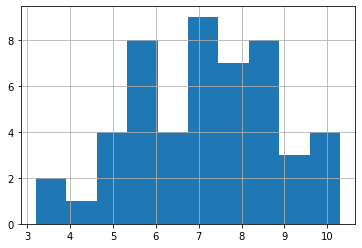

In [57]:
state_data['Unemployment'].hist()

In [62]:
state_data[state_data['State'] == "NY"]

,State,Unemployment
31,NY,8.4


In [65]:
m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_data,
    columns=['State', 'Unemployment'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Unemployment Rate (%)'
).add_to(m)

folium.LayerControl().add_to(m)

m

## Exercise
Create a Choropleth map that indicate the size of population of each state.

In [66]:
# Load the population data
# https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/state/detail/SCPRC-EST2019-18+POP-RES.csv
url = "https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/state/detail/SCPRC-EST2019-18+POP-RES.csv"
populations = pd.read_csv(url)
populations.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2019,POPEST18PLUS2019,PCNT_POPEST18PLUS
0,10,0,0,0,United States,328239523,255200373,77.7
1,40,3,6,1,Alabama,4903185,3814879,77.8
2,40,4,9,2,Alaska,731545,551562,75.4
3,40,4,8,4,Arizona,7278717,5638481,77.5
4,40,3,7,5,Arkansas,3017804,2317649,76.8


In [68]:
# Keep only the Name column and popesimate2019 column
populations = populations[["NAME", "POPESTIMATE2019"]]
populations.head()

,NAME,POPESTIMATE2019
0,United States,328239523
1,Alabama,4903185
2,Alaska,731545
3,Arizona,7278717
4,Arkansas,3017804


In [69]:
# Remove the first row on total population
populations = populations.drop([0])
populations.head()

,NAME,POPESTIMATE2019
1,Alabama,4903185
2,Alaska,731545
3,Arizona,7278717
4,Arkansas,3017804
5,California,39512223


In [70]:
populations.shape

(52, 2)

In [71]:
# Create the choropleth map
m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=populations,
    columns=['NAME', 'POPESTIMATE2019'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Population'
).add_to(m)

folium.LayerControl().add_to(m)

m

## Case Study: Visualize COVID Cases

COVID-19 is the most challenging crisis that humanity has faced since the second world war. Let's visualize how COVID-19 has impacted the world.

In [ ]:
import requests
res = requests.get('https://api.thevirustracker.com/free-api?countryTotals=ALL')
covid_current = res.json()

In [ ]:
covid_current['countryitems'][0]['1']

In [ ]:
df = []
for j in range(1,len(covid_current['countryitems'][0])):
    df.append([covid_current['countryitems'][0]['{}'.format(j)]['title'],
               covid_current['countryitems'][0][f'{j}']['total_cases']])

In [ ]:
df_covid = pd.DataFrame(df, columns = ['Country', 'Total Case'])

In [ ]:
df_covid.head()

In [ ]:
df_covid.replace('USA', "United States of America", inplace = True)
df_covid.replace('Tanzania', "United Republic of Tanzania", inplace = True)
df_covid.replace('Democratic Republic of Congo', "Democratic Republic of the Congo", inplace = True)
df_covid.replace('Congo', "Republic of the Congo", inplace = True)
df_covid.replace('Lao', "Laos", inplace = True)
df_covid.replace('Syrian Arab Republic', "Syria", inplace = True)
df_covid.replace('Serbia', "Republic of Serbia", inplace = True)
df_covid.replace('Czechia', "Czech Republic", inplace = True)
df_covid.replace('UAE', "United Arab Emirates", inplace = True)

In [ ]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'

In [ ]:
m = folium.Map()

folium.Choropleth(
   geo_data=country_shapes,
    name='choropleth',
    data=df_covid,
    columns=['Country', 'Total Case'],
    key_on='feature.properties.name',
    fill_color='PuRd',
    nan_fill_color='white'
).add_to(m)

folium.LayerControl().add_to(m)

m

In [ ]:
# Country coordinates
# https://www.kaggle.com/eidanch/counties-geographic-coordinates
countries = pd.read_csv(path + 'countries.csv')
countries = countries.dropna()
countries.head()

In [ ]:
for lat, lon, name in zip(countries['latitude'], countries['longitude'],countries['name']):
    folium.Marker(
    location=[lat, lon],
    popup=name
    ).add_to(m)

In [ ]:
m